# Ejemplo con Datos demográficos

In [1]:
#!git clone https://github.com/cgg-upm/upm-dma-som
#!dir upm-dma-som\som
#!copy upm-dma-som\som\som.py .\*.*
#!copy upm-dma-som\som\utils.py .\*.*

In [2]:
from som import som
from utils import somutils

In [3]:
import numpy as np
import pandas as pd

## Ejemplo datos Población de Irlanda

* Datos: censo irlandés, area de Dublín, año 2011
* Visualización de los resultados

[Censo Irlanda 2011](https://www.cso.ie/en/census/census2011smallareapopulationstatisticssaps/)

[Referencia código R](https://www.shanelynn.ie/self-organising-maps-for-customer-segmentation-using-r/)

Los datos _cocinados_ en: `dataIrelandPopulationSOM.csv`

In [4]:
df = pd.read_csv('data/dataIrelandPopulationSOM.csv')
df.head()

,Unnamed: 0,id,avr_age,avr_household_size,avr_education_level,avr_num_cars,avr_health,rented_percent,unemployment_percent,internet_percent,single_percent,married_percent,separated_percent,divorced_percent,widow_percent
0,15687,267123023,40.028112,2.524752,3.038462,1.039604,4.385542,6.930693,15.343915,71.000000,53.413655,33.333333,4.819277,2.811245,5.622490
1,13895,267016001,35.673660,3.320611,3.597701,1.983740,4.509434,4.878049,12.461059,72.950820,49.417249,44.988345,1.398601,0.233100,3.962704
2,13896,267016002,35.882353,3.324324,4.295302,1.905405,4.596639,1.351351,10.404624,83.783784,47.478992,43.697479,3.361345,0.000000,5.462185
3,13729,267002034,38.516667,3.088608,3.871795,1.730769,4.530172,3.896104,8.108108,78.947368,47.083333,48.333333,0.833333,1.250000,2.500000
4,13724,267002029,24.678005,3.512000,3.933735,1.112000,4.510345,20.800000,21.810700,81.300813,67.120181,26.984127,2.267574,1.587302,2.040816


In [5]:
df.columns

Index(['Unnamed: 0', 'id', 'avr_age', 'avr_household_size',
       'avr_education_level', 'avr_num_cars', 'avr_health', 'rented_percent',
       'unemployment_percent', 'internet_percent', 'single_percent',
       'married_percent', 'separated_percent', 'divorced_percent',
       'widow_percent'],
      dtype='object')

In [6]:
df.values.shape

(4806, 15)

In [7]:
columns=['avr_age','avr_education_level','avr_num_cars','unemployment_percent']
X = df[columns].to_numpy()
X.shape

(4806, 4)

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X_std.shape

(4806, 4)

## Definir y entrenar el SOM

In [9]:
nrows = 10
ncols = 10
smm = som(nrows=nrows,ncols=ncols)

In [10]:
smm.train_SOM(train_data=X_std,epochs=1000)

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:46<00:00,  6.01it/s]


### Gráfico con el clustering y el recuento de nodos

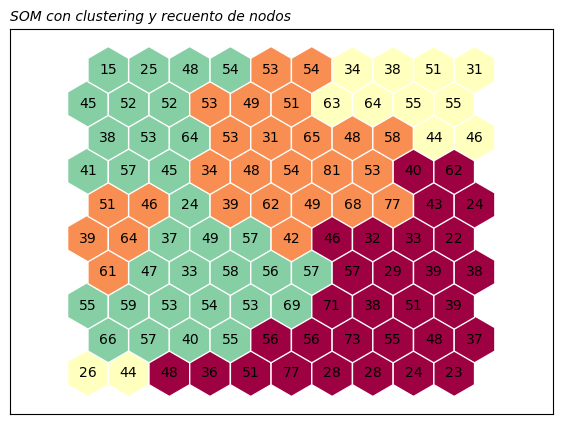

In [11]:
somutils.plot_Cluster_hexagon(pSom=smm, n_clusters=4, figsize=(7,5))

## Recuento de observaciones por neurona

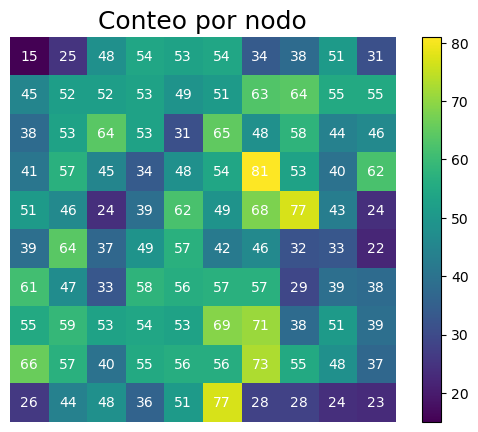

In [12]:
somutils.plot_neurPointsCount(pSom=smm, figsize=(7,5))

## Mapeo de valores

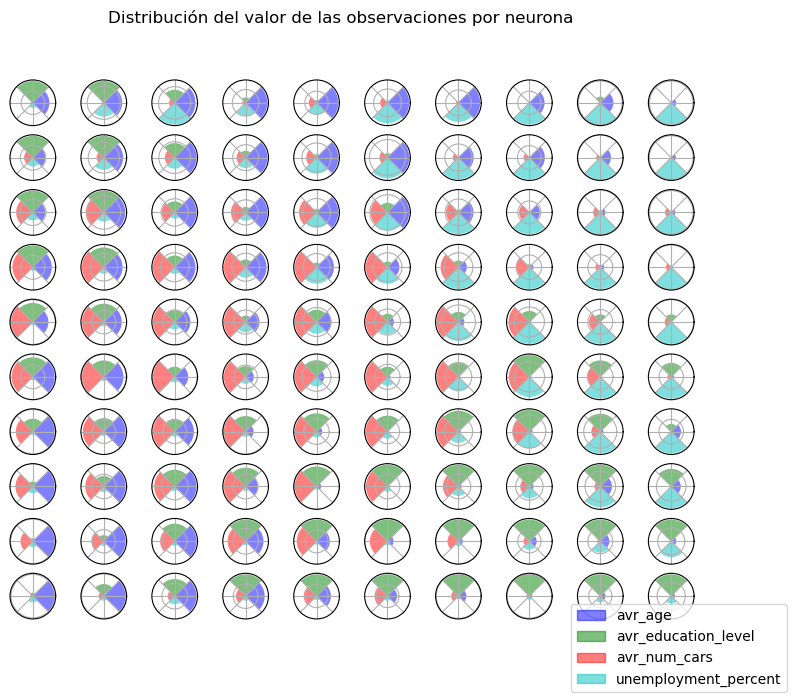

In [14]:
somutils.plot_valuesMap(pSom=smm, labels=columns, figsize=(9,7))

## Mapas de calor

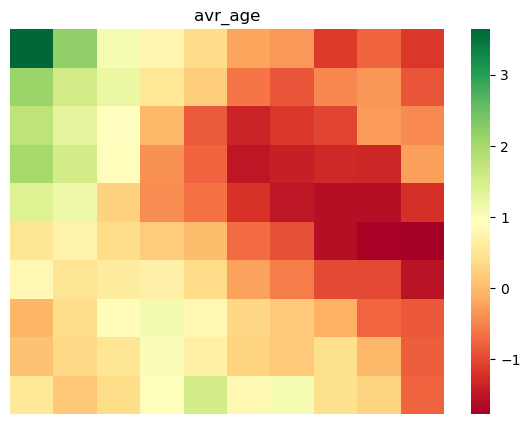

In [15]:
somutils.plot_heatmaps(pSom=smm, labels=columns, ilabMap=[0], figsize=(7,5))

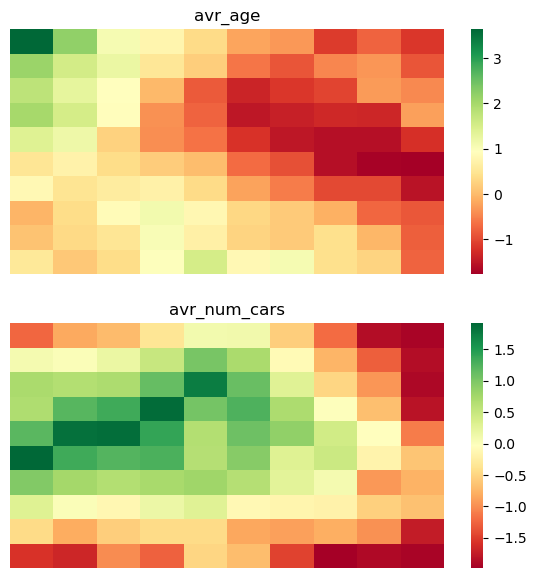

In [16]:
somutils.plot_heatmaps(pSom=smm, labels=columns, ilabMap=[0,2], figsize=(7,7))

## Mapeo de observaciones sobre cada neurona

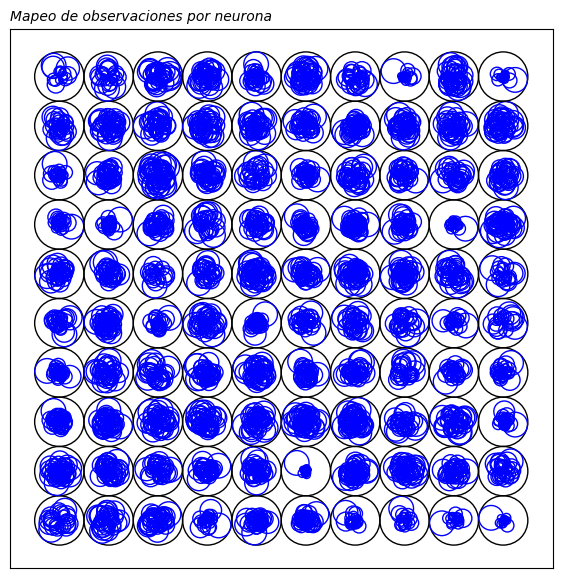

In [17]:
somutils.plot_pointsMap(pSom=smm, figsize=(7,7))

### Dibujo de la matriz de distancias unificadas (U-Matrix)

Contiene la distancia entre los nodos del SOM. En el gráfico a más intensidad hay una menor distancia entre las neuronas adyacentes. Para cada neurona se calcula la distancia entre ella y sus neuronas vecinas más próximas. Cuanto menor sea el resultado, más próxima estará la neurona con sus vecinas.

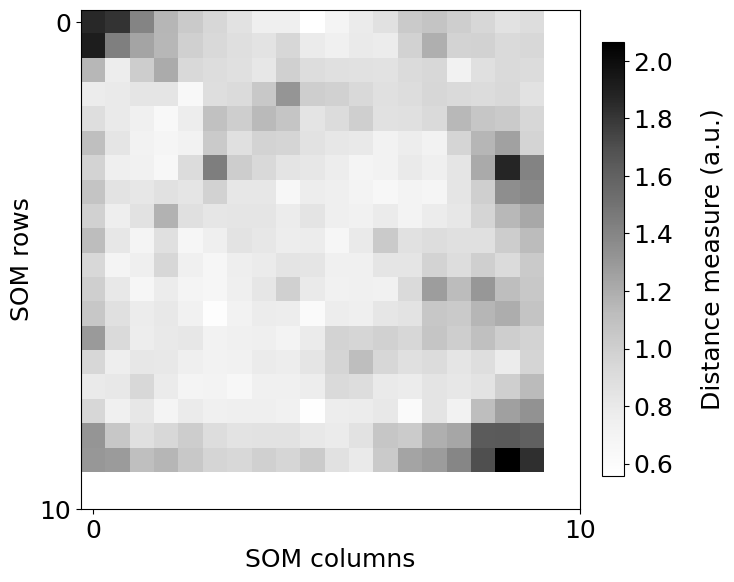

In [18]:
somutils.plot_u_matrix(pSom=smm, figsize=(7,7))

### Distancia media a la neurona más próxima por iteración


### Acceder a los datos asociados a cada neurona

__Índices de las observaciones de una neurona, por ejemplo la neurona del nodo (0, 0)__

In [19]:
smm.getIndexDataNeur(0, 0)

[358,
 509,
 592,
 1150,
 2275,
 2291,
 2614,
 2679,
 2874,
 3358,
 3663,
 4056,
 4548,
 4575,
 4616]

__Y los datos de las observaciones asociados a la neurona (0,0)__

In [20]:
smm.getDataNeuron(0, 0)

array([[ 3.55461107, -1.17606894, -0.00668237, -0.95085398],
       [ 5.12205458, -2.21035108, -2.19576895, -1.09566804],
       [ 4.25834102,  0.13497855, -0.71237514, -1.3573555 ],
       [ 4.24138028, -2.20100199, -2.16120313,  0.90350239],
       [ 4.01199396, -1.31753956, -1.048184  , -0.20077091],
       [ 3.63475285, -0.4171682 , -0.60048507, -0.52359655],
       [ 5.50176976, -2.02446919, -2.13729295, -0.82911198],
       [ 3.90504535,  0.03194642,  0.01843919, -0.82911198],
       [ 2.82107824, -0.60150783, -0.98960405, -0.45342247],
       [ 2.37090603, -1.11238306, -1.37955104, -0.62076932],
       [ 2.65671867, -1.11936817, -1.6777348 ,  0.30845329],
       [ 3.30487664, -1.54268176, -1.9888849 ,  0.26723158],
       [ 2.51994613, -1.11316417, -1.2721556 , -0.96045845],
       [ 3.5655327 , -1.53920551, -2.05540875, -0.63940092],
       [ 3.20226478, -0.91215227, -0.45874963, -1.11153448]])

## Clústeres sobre el mapa topográfico

Si los datos contienen información GIS, es posible representar qué puntos del mapa topográfico de Dublín están relacionados con qué clústeres.

:::{figure-md} markdown-fig.6.05.1
<img src="./images/SOM_Rplot_Ireland.png" alt="fishy" class="bg-primary mb-1" width="600px">

Geolocalización de los clústeres hallados